In [11]:
import pandas as pd
import utils.DataEngine as de
import trader as tr
import matplotlib.pyplot as plt

In [12]:
de = de.DataEngine('data2024')

In [47]:
df = de.data['round_1']['price_df']

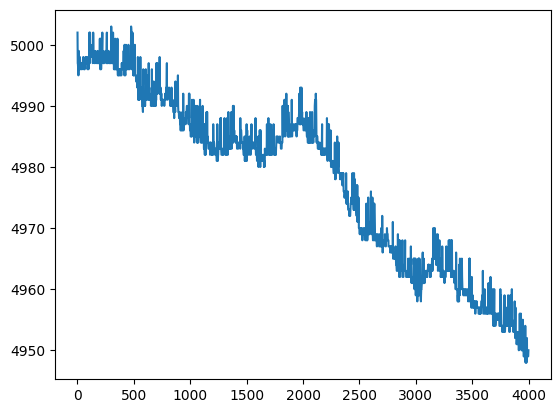

In [95]:
plt.plot(df[df['product'] == 'STARFRUIT']['bid_price_1'])

In [90]:
adf = df[df['product'] == 'AMETHYSTS'].copy()
mean = adf['mid_price'].mean()
bid_mean = adf['bid_price_1'].mean()
ask_mean = adf['ask_price_1'].mean()

In [92]:
adf[adf['bid_price_1'] <= bid_mean]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
5,-2,200,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,0.0
6,-2,300,AMETHYSTS,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,0.0
8,-2,400,AMETHYSTS,9996,2,9995.0,25.0,NaN,NaN,10004,2,10005.0,25.0,NaN,NaN,10000.0,0.0
10,-2,500,AMETHYSTS,9995,30,NaN,NaN,NaN,NaN,10002,4,10005.0,30.0,NaN,NaN,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3983,-2,199100,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
3989,-2,199400,AMETHYSTS,9996,1,9995.0,22.0,NaN,NaN,10004,1,10005.0,22.0,NaN,NaN,10000.0,0.0
3992,-2,199600,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10002,7,10004.0,1.0,10005.0,21.0,9999.0,0.0
3997,-2,199800,AMETHYSTS,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,0.0


In [93]:
bid_mean

9996.627

In [91]:
adf[adf['ask_price_1'] >= ask_mean]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
5,-2,200,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,0.0
6,-2,300,AMETHYSTS,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,0.0
8,-2,400,AMETHYSTS,9996,2,9995.0,25.0,NaN,NaN,10004,2,10005.0,25.0,NaN,NaN,10000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,-2,199300,AMETHYSTS,9998,3,9996.0,2.0,9995.0,22.0,10004,2,10005.0,22.0,NaN,NaN,10001.0,0.0
3989,-2,199400,AMETHYSTS,9996,1,9995.0,22.0,NaN,NaN,10004,1,10005.0,22.0,NaN,NaN,10000.0,0.0
3991,-2,199500,AMETHYSTS,10002,1,9996.0,1.0,9995.0,22.0,10004,1,10005.0,22.0,NaN,NaN,10003.0,0.0
3995,-2,199700,AMETHYSTS,9998,8,9996.0,2.0,9995.0,25.0,10004,2,10005.0,25.0,NaN,NaN,10001.0,0.0


In [94]:
ask_mean

10003.4805

In [87]:
adf

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
5,-2,200,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,0.0
6,-2,300,AMETHYSTS,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,0.0
8,-2,400,AMETHYSTS,9996,2,9995.0,25.0,NaN,NaN,10004,2,10005.0,25.0,NaN,NaN,10000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,-2,199500,AMETHYSTS,10002,1,9996.0,1.0,9995.0,22.0,10004,1,10005.0,22.0,NaN,NaN,10003.0,0.0
3992,-2,199600,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10002,7,10004.0,1.0,10005.0,21.0,9999.0,0.0
3995,-2,199700,AMETHYSTS,9998,8,9996.0,2.0,9995.0,25.0,10004,2,10005.0,25.0,NaN,NaN,10001.0,0.0
3997,-2,199800,AMETHYSTS,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,0.0
